In [2]:
import os
import sys

import pandas as pd 
import numpy as np 

import statsmodels.formula.api as smf
import statsmodels.tsa.api as smt 
import statsmodels.api as sm 
import scipy.stats as scs

import matplotlib.pyplot as plt 
import matplotlib as mpl
%matplotlib inline

In [3]:
from backtester.dataSource.yahoo_data_source import YahooStockDataSource

In [4]:
startDateStr = '2014/12/31'
endDateStr = '2017/12/31'
cachedFolderName = '/mnt/c/Users/kaagrawa/Desktop/HARSHIT_NITT/Eco_project/yahooData/'
dataSetId = 'testPairsTrading'
instrumentIds = ['^GSPC','DOW','MSFT']
ds = YahooStockDataSource(cachedFolderName=cachedFolderName,
                            dataSetId=dataSetId,
                            instrumentIds=instrumentIds,
                            startDateStr=startDateStr,
                            endDateStr=endDateStr,
                            event='history')
data = ds.getBookDataByFeature()['adjClose']
# log returns
lrets = np.log(data/data.shift(1)).dropna()

Processing data for stock: ^GSPC
Processing data for stock: DOW
Processing data for stock: MSFT
20% done...
40% done...
60% done...
80% done...


In [5]:
def tsplot(y, lags=None, figsize=(15, 10), style='bmh'):
    if not isinstance(y, pd.Series):
        y = pd.Series(y)
    with plt.style.context(style):    
        fig = plt.figure(figsize=figsize)
        #mpl.rcParams['font.family'] = 'Ubuntu Mono'
        layout = (3, 2)
        ts_ax = plt.subplot2grid(layout, (0, 0), colspan=2)
        acf_ax = plt.subplot2grid(layout, (1, 0))
        pacf_ax = plt.subplot2grid(layout, (1, 1))
        qq_ax = plt.subplot2grid(layout, (2, 0))
        pp_ax = plt.subplot2grid(layout, (2, 1))
        
        y.plot(ax=ts_ax)
        ts_ax.set_title('Time Series Analysis Plots')
        smt.graphics.plot_acf(y, lags=lags, ax=acf_ax, alpha=0.05)
        smt.graphics.plot_pacf(y, lags=lags, ax=pacf_ax, alpha=0.05)
        sm.qqplot(y, line='s', ax=qq_ax)
        qq_ax.set_title('QQ Plot')        
        scs.probplot(y, sparams=(y.mean(), y.std()), plot=pp_ax)

        plt.tight_layout()
    return

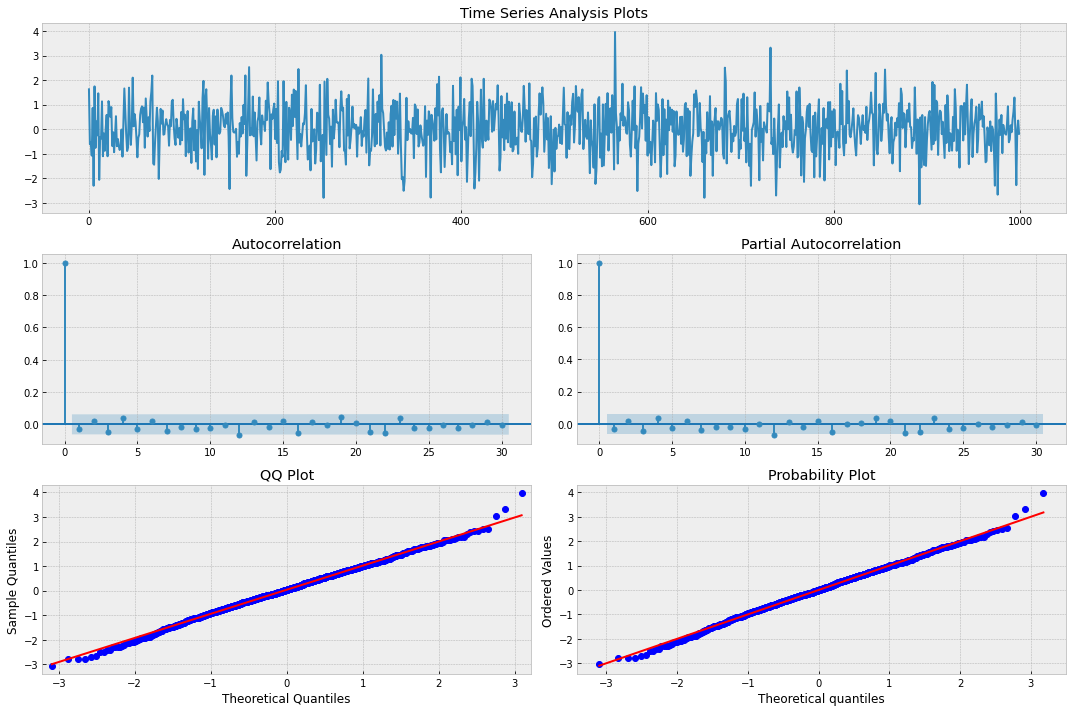

In [6]:
np.random.seed(1)

# plot of discrete white noise
randser = np.random.normal(size=1000)
tsplot(randser, lags=30)

In [7]:
print("Random Series\n -------------\nmean: %.3f \nvariance: %.3f \nstandard deviation: %.3f"
      %(randser.mean(), randser.var(), randser.std()))

Random Series
 -------------
mean: 0.039 
variance: 0.962 
standard deviation: 0.981


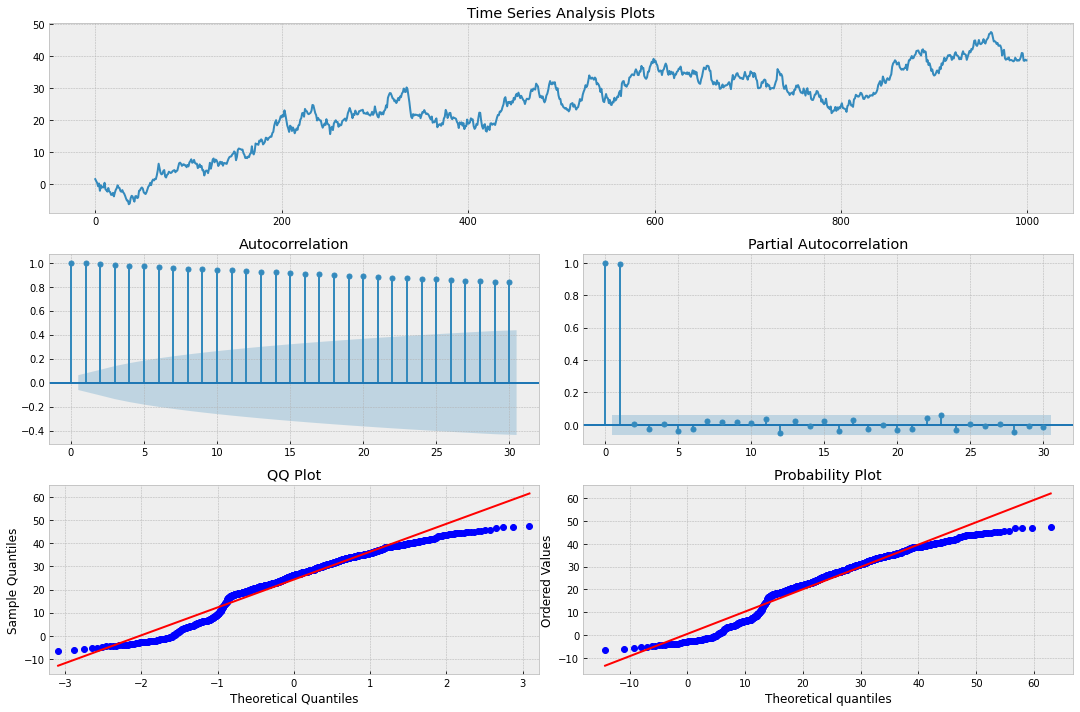

In [9]:
# Random Walk without a drift

np.random.seed(1)
n_samples = 1000

x = w = np.random.normal(size=n_samples)
for t in range(n_samples):
    x[t] = x[t-1] + w[t]

_ = tsplot(x, lags=30)

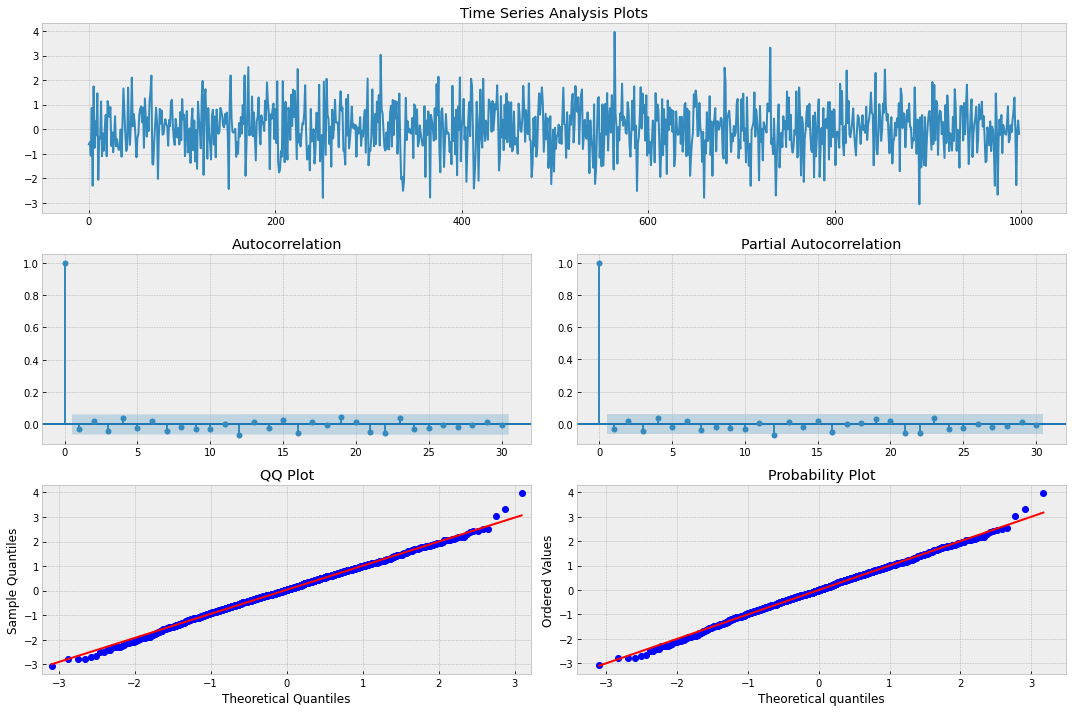

In [10]:
# First difference of simulated Random Walk series
_ = tsplot(np.diff(x), lags=30)

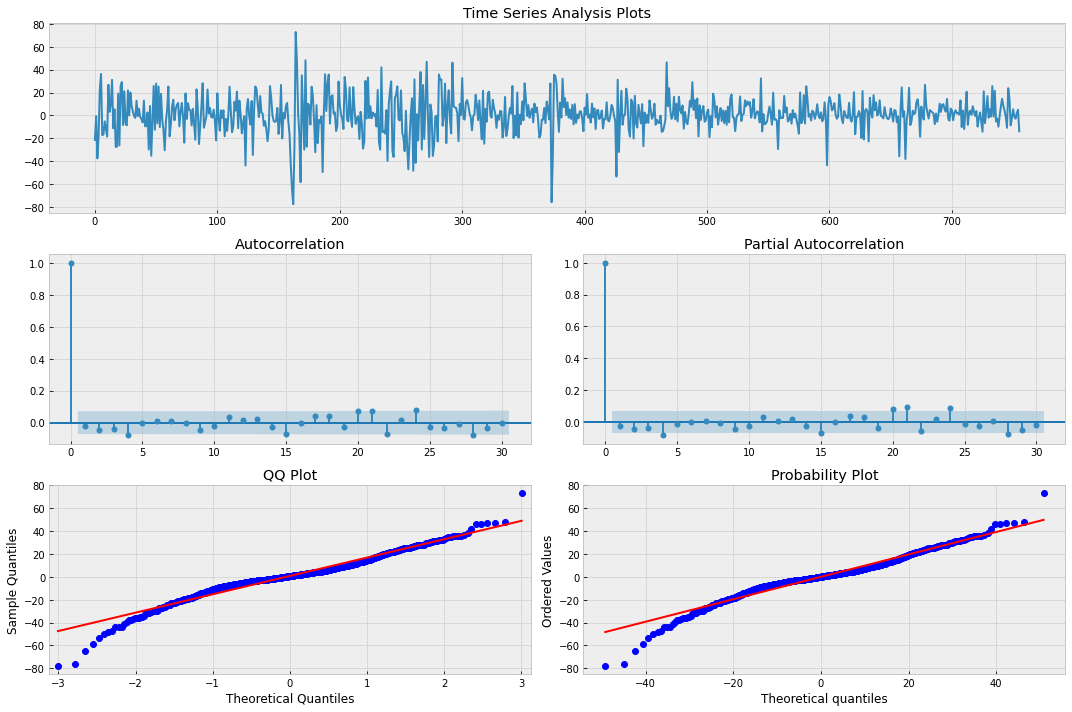

In [11]:
# First difference of SPX prices
_ = tsplot(np.diff(data['^GSPC']), lags=30)

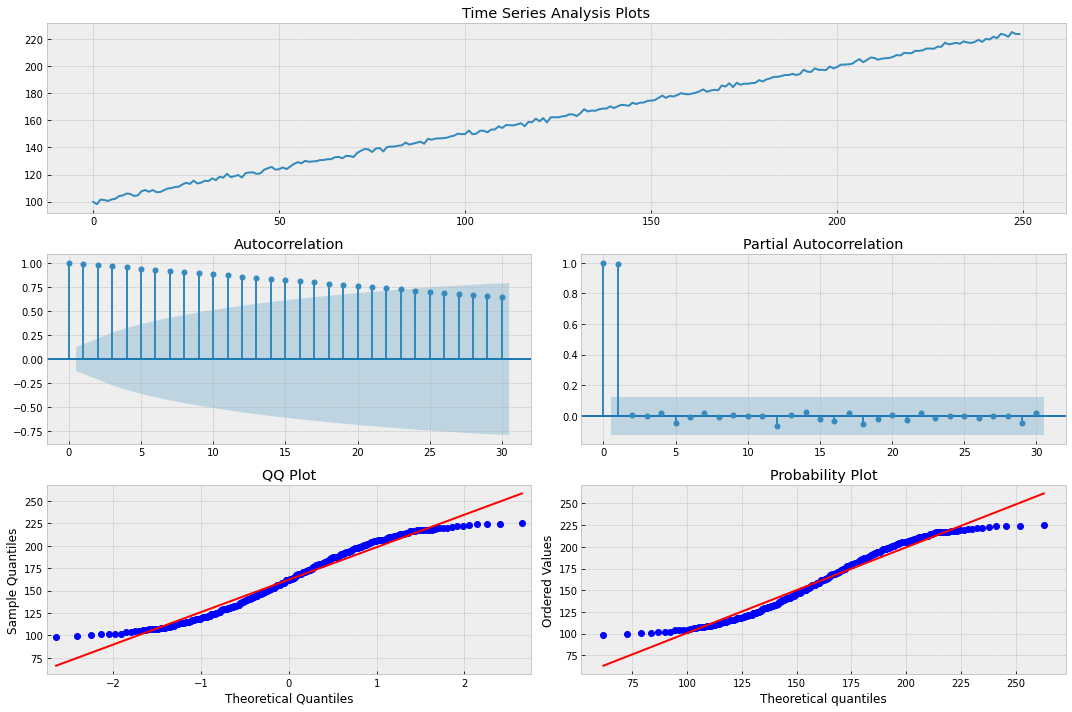

In [12]:
w = np.random.randn(250)
x = np.empty_like(w)

a0 = 100.
a1 = 0.5
for t in range(len(w)):
    x[t] = a0 + a1*t + w[t]
_ = tsplot(x,lags=30)

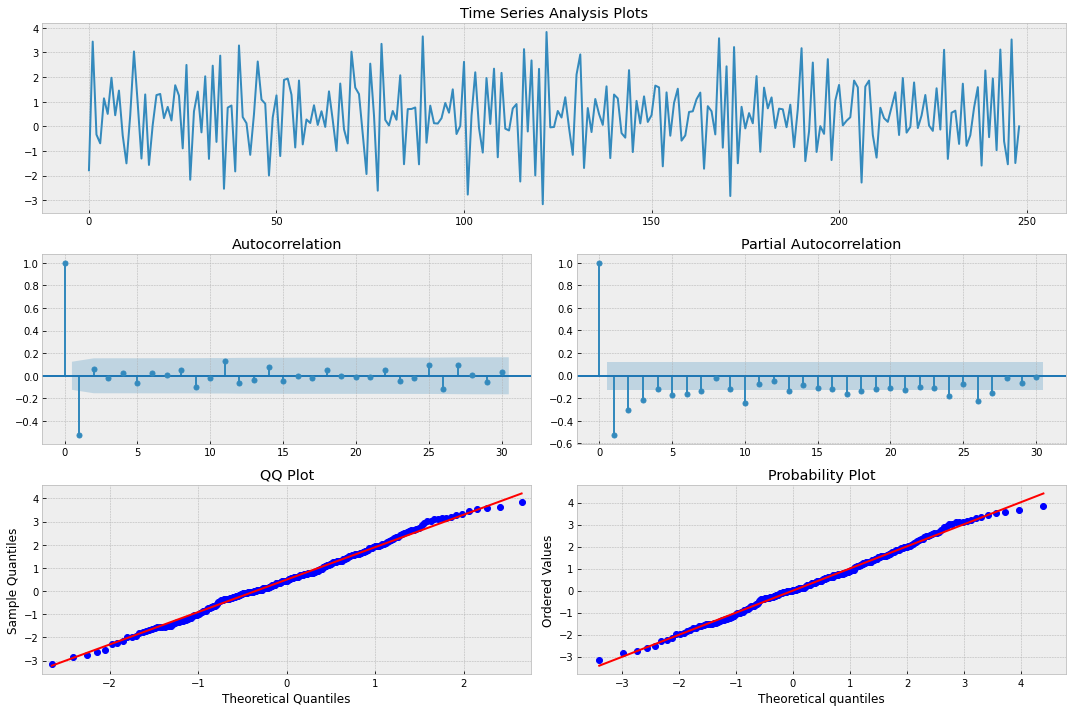

In [14]:
_ = tsplot(np.diff(x),lags=30)

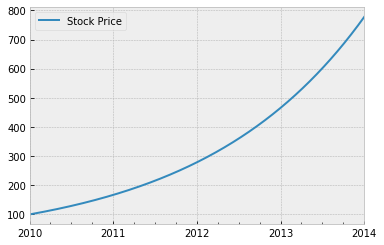

In [18]:
idx = pd.date_range('2010-01-01','2014-01-01',freq = 'D')
price = [np.exp(4.605+float(x)/712) for x in range(0,len(idx))]

df = pd.DataFrame(price,columns = ['Stock Price'],index = idx)

with plt.style.context('bmh'):
    df.plot()

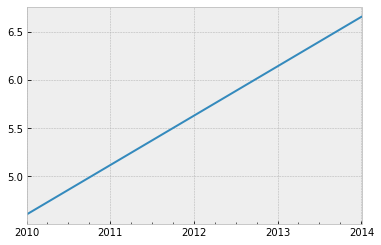

In [19]:
with plt.style.context('bmh'):
    pd.Series(np.log(price),index = idx).plot()

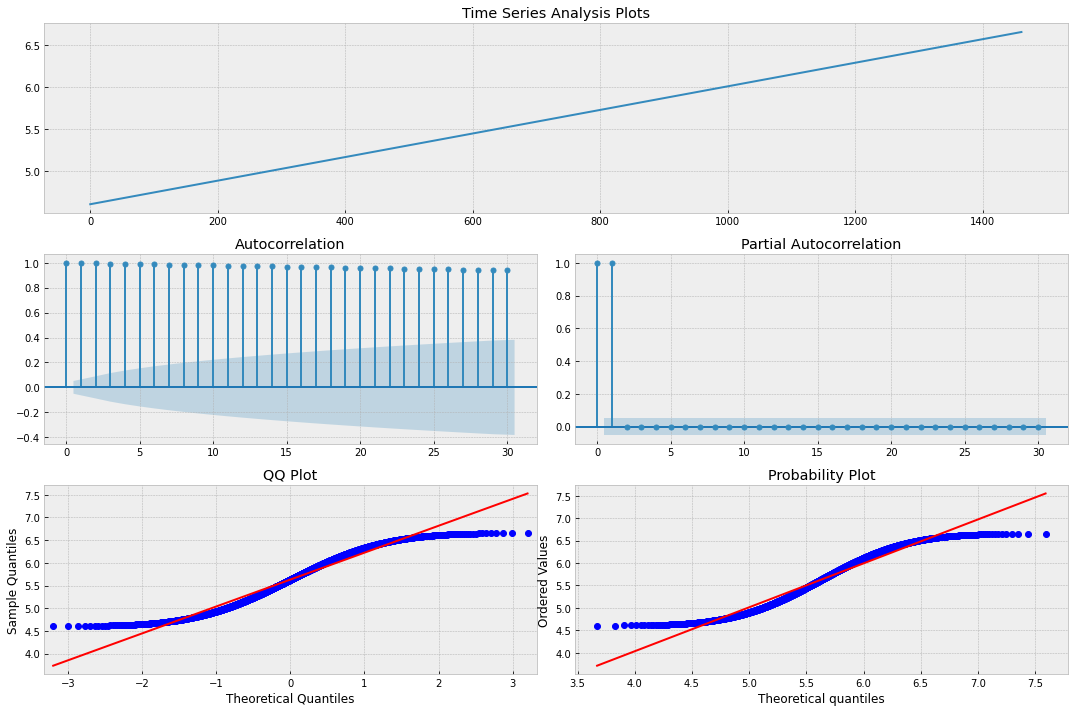

In [20]:
_ = tsplot(np.log(price),lags = 30)